In [1]:
import csv

import numpy as np
import torch
from torch import Tensor
from torch.utils.data import TensorDataset, DataLoader
import os
import matplotlib.pyplot as plt
import cv2

In [2]:
DATASET_PATH = "data/poker_cards"

In [3]:
cards = []

def get_dataloader(path_to_folder: str):
    path_to_folder = os.path.join(DATASET_PATH, path_to_folder)
    csv_path = os.path.join(path_to_folder, "_classes.csv")
    
    X_list = []
    Y_list = []
    
    with open(csv_path, 'r') as f:
      csv_reader = csv.reader(f)
      
      # Skip first line because it contains the classes
      first_line = next(csv_reader)
      cards.extend(first_line[1:])
      
      # Iterate through the rows in the CSV file
      for row in csv_reader:
        rel_image_path = row[0]
        image = cv2.imread(os.path.join(path_to_folder, rel_image_path))
        
        # Convert Image to Tensor
        img_tensor = torch.tensor(image)
        
        # Add the created tensors to the list
        X_list.append(img_tensor)
        Y_list.append(torch.tensor(list(map(int, row[1:]))))
      
      x: Tensor = torch.stack(X_list)
      y: Tensor = torch.stack(Y_list)
      dataset = TensorDataset(x, y)
      return DataLoader(dataset, batch_size=1, shuffle=True)
        
dl = get_dataloader("test")
print(dl)
print(cards)

[' 10 Diamonds', ' 10 Hearts', ' 10 Spades', ' 10 Trefoils', ' 2 Diamonds', ' 2 Hearts', ' 2 Spades', ' 2 Trefoils', ' 3 Diamonds', ' 3 Hearts', ' 3 Spades', ' 3 Trefoils', ' 4 Diamonds', ' 4 Hearts', ' 4 Spades', ' 4 Trefoils', ' 5 Diamonds', ' 5 Hearts', ' 5 Spades', ' 5 Trefoils', ' 59', ' 6 Diamonds', ' 6 Hearts', ' 6 Spades', ' 6 Trefoils', ' 7 Diamonds', ' 7 Hearts', ' 7 Spades', ' 7 Trefoils', ' 8 Diamonds', ' 8 Hearts', ' 8 Spades', ' 8 Trefoils', ' 9 Diamonds', ' 9 Hearts', ' 9 Spades', ' 9 Trefoils', ' A Diamonds', ' A Hearts', ' A Spades', ' A Trefoils', ' J Diamonds', ' J Hearts', ' J Spades', ' J Trefoils', ' K Diamonds', ' K Hearts', ' K Spades', ' K Trefoils', ' Q Diamonds', ' Q Hearts', ' Q Spades', ' Q Trefoils']


tensor([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 1])
[' 10 Diamonds', ' 10 Hearts', ' 10 Spades', ' 10 Trefoils', ' 2 Diamonds', ' 2 Hearts', ' 2 Spades', ' 2 Trefoils', ' 3 Diamonds', ' 3 Hearts', ' 3 Spades', ' 3 Trefoils', ' 4 Diamonds', ' 4 Hearts', ' 4 Spades', ' 4 Trefoils', ' 5 Diamonds', ' 5 Hearts', ' 5 Spades', ' 5 Trefoils', ' 59', ' 6 Diamonds', ' 6 Hearts', ' 6 Spades', ' 6 Trefoils', ' 7 Diamonds', ' 7 Hearts', ' 7 Spades', ' 7 Trefoils', ' 8 Diamonds', ' 8 Hearts', ' 8 Spades', ' 8 Trefoils', ' 9 Diamonds', ' 9 Hearts', ' 9 Spades', ' 9 Trefoils', ' A Diamonds', ' A Hearts', ' A Spades', ' A Trefoils', ' J Diamonds', ' J Hearts', ' J Spades', ' J Trefoils', ' K Diamonds', ' K Hearts', ' K Spades', ' K Trefoils', ' Q Diamonds', ' Q Hearts', ' Q Spades', ' Q Trefoils']
tensor([[ 2],
        [36],
        [44],
        [48],
        [52]])
 10 S

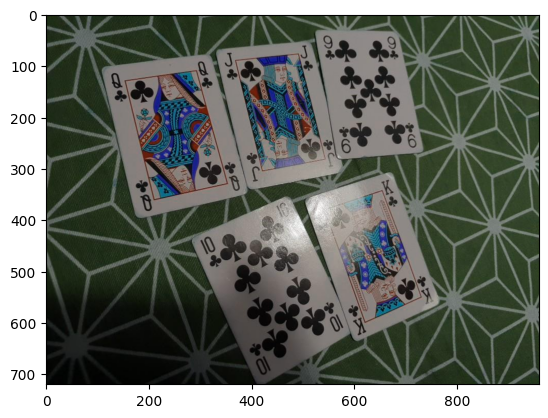

In [4]:
for x_batch, y_batch in dl:
    image1 = x_batch[0]
    y = y_batch[0]
    
    plt.imshow(image1)
    print(y)
    print(cards)
    indeces = y.nonzero()
    print(indeces)
    for index in indeces:
        print(cards[index])
    break